# Квартиры в Санкт-Петербурге

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. 

# Задача проекта 

С помощью данных сервиса Яндекс.Недвижимость определить рыночную стоимость объектов недвижимости и найти интересные особенности и зависимости.

### Загрузка и проверка данных

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
display(data.head())
print()
print(data.info())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest  

По первым строчкам ничего особо не выделяется, кроме  столбца first_day_exposition, в котором первые 5 значений записаны без часов, минут и секунд, и в столбце is_apartment пока одни пропуски

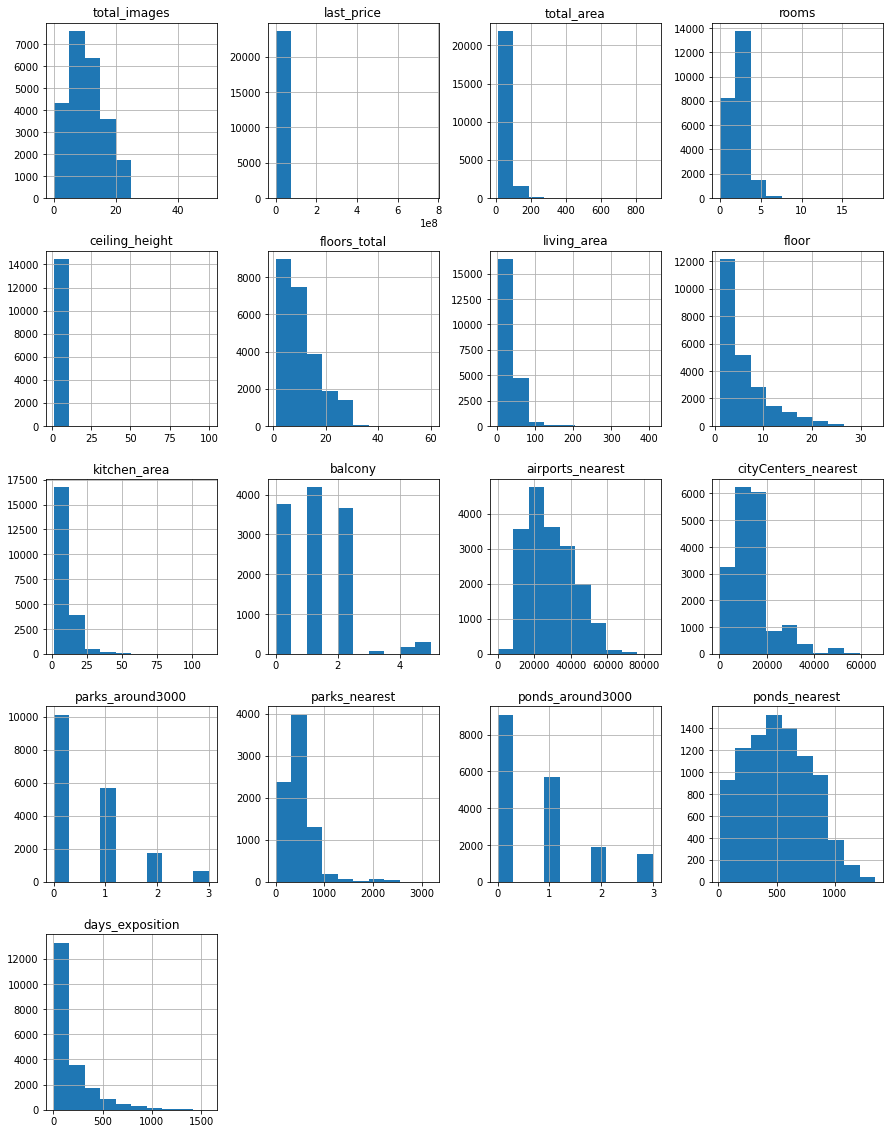

In [3]:
data.hist(figsize = (15, 20));

Ничего особенного нет, кроме двух графиков last_price и ceiling_height. Сделаем их в другом масштабе

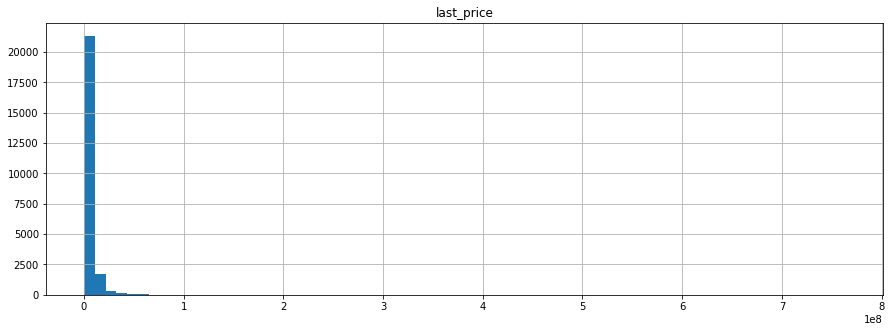

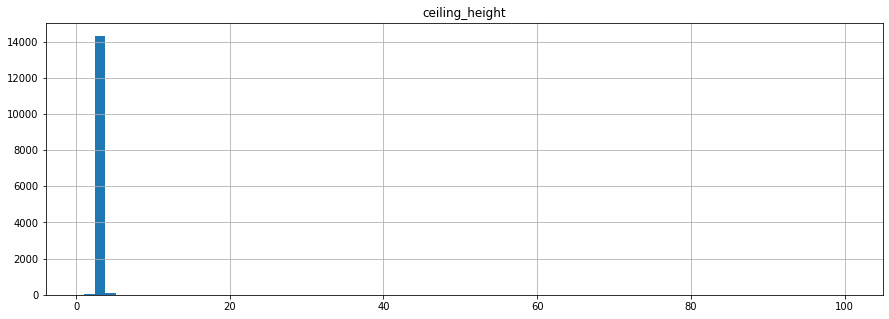

In [4]:
data.hist('last_price', bins=70, figsize=(15,5));
data.hist('ceiling_height', bins=70, figsize=(15,5));

По графикам видно, что у обоих графиков есть сильно выделяющийся диапазон значений

### Предобработка данных

In [5]:
print(data['first_day_exposition']) #сначала разберемся со временем создания объявления

0        2019-03-07T00:00:00
1        2018-12-04T00:00:00
2        2015-08-20T00:00:00
3        2015-07-24T00:00:00
4        2018-06-19T00:00:00
                ...         
23694    2017-03-21T00:00:00
23695    2018-01-15T00:00:00
23696    2018-02-11T00:00:00
23697    2017-03-28T00:00:00
23698    2017-07-21T00:00:00
Name: first_day_exposition, Length: 23699, dtype: object


Данные были собраны без учета часов, минут и секунд, поэтому их можно убрать

In [6]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
print(data['first_day_exposition'])

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]


Теперь займемся пропусками по порядку столбцов

In [7]:
missing_values = data.isna().sum() #посмотрим в каких столбцах есть пропуски и сколько их
print(missing_values)

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [8]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace = True)

data.dropna(subset = ['floors_total'], inplace = True)

#заполним пропуски в столбце living_area средним значением по кол-ву комнат в доме, чтобы было точнее
for room in data['rooms'].unique():
    mean_living_area = data[data['rooms'] == room]['living_area'].mean() #считаем среднее значение для определенного кол-ва комнат
    data.loc[(data['living_area'].isna()) & (data['rooms'] == room), 'living_area'] = mean_living_area #заменяем пропуски средним значением

data['is_apartment'] = data['is_apartment'].fillna(False)

data['kitchen_area'].fillna(data['kitchen_area'].median(), inplace = True)  # пропусков в этом столбце не слишком много, чтобы их оставить, поэтому их можно заполнить медийным значением

data['balcony'] = data['balcony'].fillna(0)

data.dropna(subset = ['locality_name'], inplace = True)

data['airports_nearest'] = data['airports_nearest'].fillna(-1)#т.к. если поставить 0, то квартира будет в аэропорту

data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(-1)

data['parks_around3000'] = data['parks_around3000'].fillna(0)

data['parks_nearest'] = data['parks_nearest'].fillna(-1)

data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

data['ponds_nearest'] = data['ponds_nearest'].fillna(-1)

# Чтобы изменить тип данных в столбце "days_exposition", пока заполним пропуски "-1".
data['days_exposition'] = data['days_exposition'].fillna(-1)

In [9]:
print()
missing_values = data.isna().sum()
print(missing_values)


total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64


В таких столбцах, как: ceiling_height(высота потолков), kitchen_area(площадь кухни), living_area(жилая площадь) пропуски могли появиться из-за случайно пропущенного данного параметра при заполнении объявления, ошибки вследствие передачи информации или в отсутствии данной информации у продавца.
    В столбцах: airports_nearest(расстояние до ближайшего аэропорта), cityCenters_nearest(расстояние до центра города), parks_around3000(кол-во парков в радиусе 3 км), parks_nearest(расстояние до ближайшего парка), ponds_around3000(кол-во водоемов в радиусе 3км), ponds_nearest(расстояние до ближайшего водоема) следствием пропусков могло послужить то, что такого места могло просто не быть в нужном участке.
    Пропуски в столбце days_exposition(кол-во дней размещения) могли появиться из-за того, что объявление все еще было размещено.
    В столбцах: locality_name(местоположение), floors_total(кол-во этажей) на слишком маленькое количество пропусков могла повлиять невнимательность продавца, который забыл указать данный параметр.
    Отсутствием столбцов: is_apartment(аппартаменты), balcony(кол-во балконов) могло послужить отсутствие необходимости в заполнении данных.
    В days_exposition(дата размещения объявления)пропуски появились, скорее всего, из-за того, что квартиры никто не купил, поэтому эти пропуски лучше не удалять

Посмотрим на типы данных у каждого столбца

In [10]:
print(data.dtypes)
print(data.head())

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object
   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03

In [11]:
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')
print(data.dtypes)

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000                 int64
parks_nearest                  float64
ponds_around3000                 int64
ponds_nearest                  float64
days_exposition                  int64
dtype: object


floors_total имееет тип int, а не float64, т.к. кол-во этажей это целое число
balcony имеет тип int, а не float64, т.к кол-во балконов это целое число
parks_around3000 имеет тип int, а не float64, т.к. это кол-во парков 
ponds_around3000 имеет тип int, а не float64, т.к. это кол-во прудов
days_exposition имеет тип int, а не float64, т.к. кол-во дней целое число.

Исправим неявные дубликаты в столбце locality_name

In [12]:
print(data['locality_name'].unique())
print(len(data['locality_name'].unique()))#узнаем кол-во уникальных значений с неявными дубликатами, чтобы потом сравнить без них

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [13]:
data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок') #заменяем все вхождения слова посёлок на поселок
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок станции', 'поселок') #убирает одно уникальное значение
display(data['locality_name'].unique())
print(len(data['locality_name'].unique())) 

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

321


С помощью замен мы избавились от 364 - 321 = 43 неявных дубликатов

Найдем и устраним редкие и выбивающиеся значения

In [14]:
print(len(data))#посмотрим сколько осталось строк в таблице, чтобы не отбросить слишком много значений

23565


Лучше будет использовать гистограмму, а не усы, т.к. гистограмма наглядней

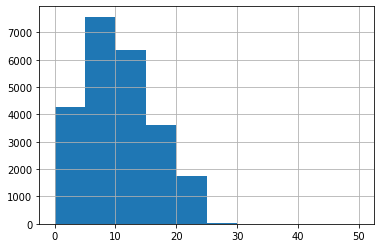

In [15]:
data['total_images'].hist();

выбивающихся значений нет

23565
23370


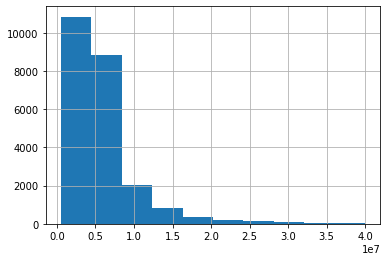

In [16]:
print(len(data['last_price']))
data = data.query('(last_price >= 500000) & (last_price <=40000000)')
data['last_price'].hist()
print(len(data['last_price']))

есть

23370
23347


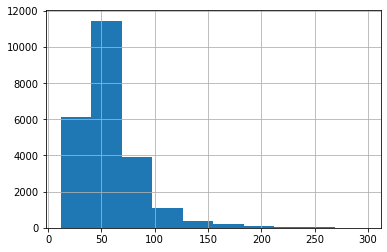

In [17]:
print(len(data['total_area']))
data = data.query('total_area <= 300')
data['total_area'].hist()
print(len(data['total_area']))

Отсортируем слишком большие значения

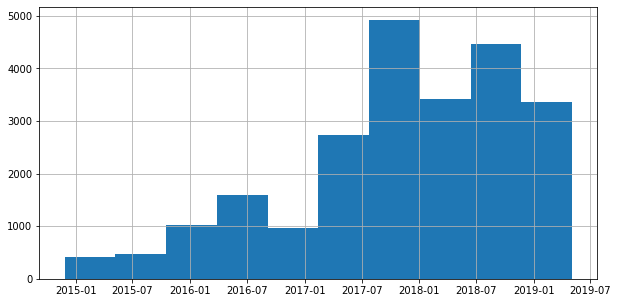

In [18]:
data['first_day_exposition'].hist(figsize=(10,5));

выбивающихся значений нет

23347
23343


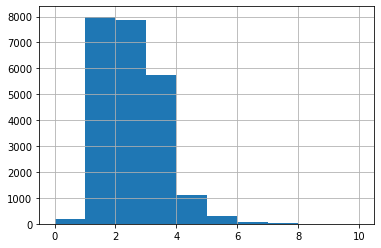

In [19]:
print(len(data['rooms']))
data = data.query('rooms <= 10')
data['rooms'].hist()
print(len(data['rooms']))

Сократим кол-во комнат до 10

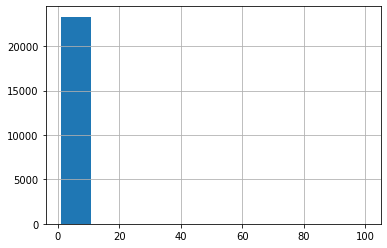

In [20]:
data['ceiling_height'].hist();

подозрительно высокие потолки, видимо, им еще не достроили крышу, но, скорее всего, некоторые значения были написаны ошибочно. Например: вместо 2,8 м написали 28 м.

23343
23299


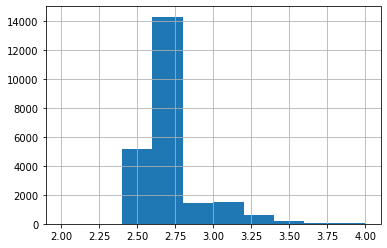

In [21]:
print(len(data['ceiling_height']))
data = data.query('(ceiling_height >= 2) & (ceiling_height <=40)')
data = data.query('(ceiling_height <= 4) | (ceiling_height >=20)')#в этом промежутке значения не поделить на 10, и потолки в квартире не могут быть выше 5 метров
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height']/10 #делим значения, которые больше 20 на 10
data['ceiling_height'].hist()
print(len(data['ceiling_height']))

Есть значения, которые выбиваются

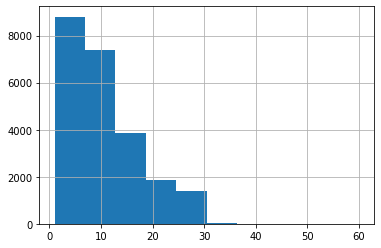

In [22]:
data['floors_total'].hist();

Сильно выбивающихся значений нет

23299
23285


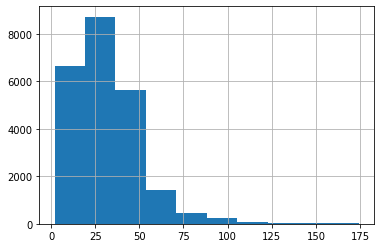

In [23]:
print(len(data['living_area']))
data = data.query('living_area < 175')
data['living_area'].hist()
print(len(data['living_area']))

Выбивающиеся значения есть даже после сортировки прошлых столбцов

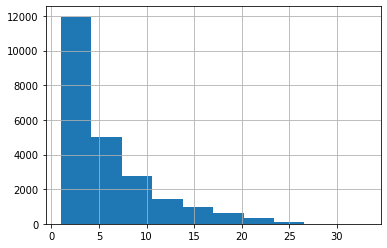

In [24]:
data['floor'].hist();

Особо выбивающихся значений нет

23285
23179


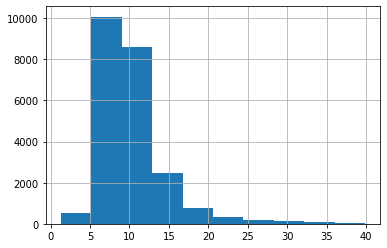

In [25]:
print(len(data['kitchen_area']))
data = data.query('kitchen_area < 40')
data['kitchen_area'].hist()
print(len(data['kitchen_area']))

уберем значения в kitchen_area от 40 и больше, т.к. получатся кухни, которые больше многих квартир

С данными в следующих графиках проблем нет

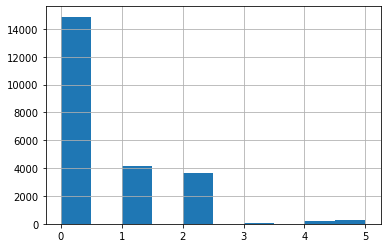

In [26]:
data['balcony'].hist();

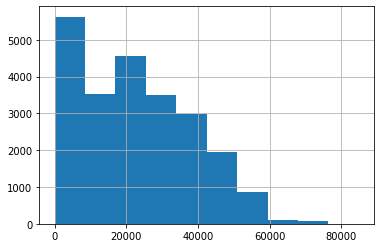

In [27]:
data['airports_nearest'].hist();

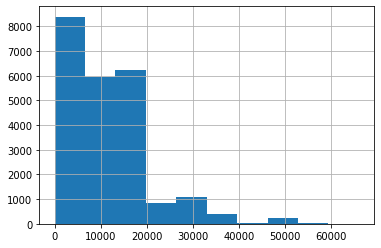

In [28]:
data['cityCenters_nearest'].hist();

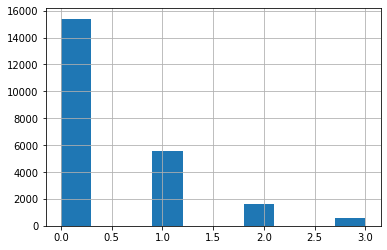

In [29]:
data['parks_around3000'].hist();

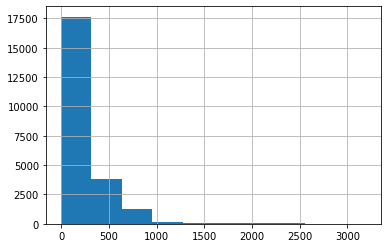

In [30]:
data['parks_nearest'].hist();

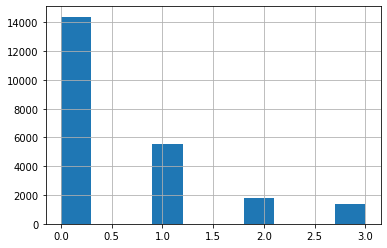

In [31]:
data['ponds_around3000'].hist();

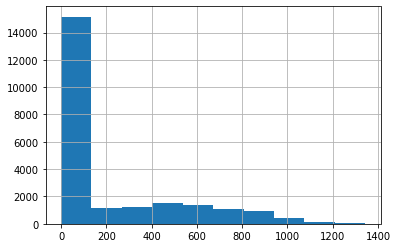

In [32]:
data['ponds_nearest'].hist();

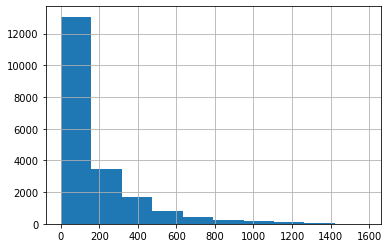

In [33]:
data.query('days_exposition > 0')['days_exposition'].hist();

Во всех этих графиках с данными нет выбивающихся значений

In [34]:
print(len(data))

23179


In [35]:
print(23565 - 23179)

386


После сортировки всех столбцов мы избавились от 386 некорректных объявлений

### Создание новых признаков

In [36]:
data = data.reset_index(drop=True)
# цена одного квадратного метра
data['price_one_meter'] =  data['last_price']/data['total_area']
# день недели, месяц, год публикации
for i in range(len(data)):
    data.loc[i, 'weekday'] = pd.Timestamp(data.loc[i, 'first_day_exposition']).weekday() # создаем столбик из дней недели
    data.loc[i, 'month'] = pd.Timestamp(data.loc[i, 'first_day_exposition']).strftime('%B')
    data.loc[i, 'year'] = pd.Timestamp(data.loc[i, 'first_day_exposition']).year
data['weekday'] = pd.to_numeric(data['weekday'], errors='coerce', downcast='integer') # переводим в целые числа
data['year'] = pd.to_numeric(data['year'], errors='coerce', downcast='integer')

In [37]:
# тип этажа квартиры
def type_floor(data):
    if data.loc['floor'] == 1:
        return 'первый'
    elif data.loc['floor'] == data.loc['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['type_floor'] = data.apply(type_floor, axis=1)

In [38]:
# расстояние до центра города
def center_km(data):
    if data.loc['cityCenters_nearest'] == -1: # тк у нас есть значения, у которых нет центра города и я обозначил их -1, то их не надо изменять
        return -1
    else:
        return round(data.loc['cityCenters_nearest'] / 1000) # остальные переводим в км и округляем
data['center_km'] = data.apply(center_km, axis = 1) # создаем новый столбец

### Исследовательский анализ данных

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23179 entries, 0 to 23178
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23179 non-null  int64         
 1   last_price            23179 non-null  float64       
 2   total_area            23179 non-null  float64       
 3   first_day_exposition  23179 non-null  datetime64[ns]
 4   rooms                 23179 non-null  int64         
 5   ceiling_height        23179 non-null  float64       
 6   floors_total          23179 non-null  int64         
 7   living_area           23179 non-null  float64       
 8   floor                 23179 non-null  int64         
 9   is_apartment          23179 non-null  bool          
 10  studio                23179 non-null  bool          
 11  open_plan             23179 non-null  bool          
 12  kitchen_area          23179 non-null  float64       
 13  balcony         

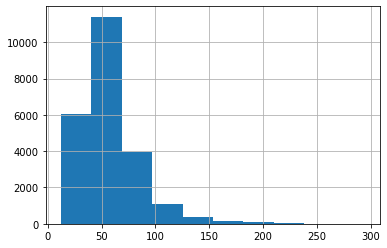

In [40]:
data['total_area'].hist();

Заметное большинство значений жилой площади находится в 50 кв. м.

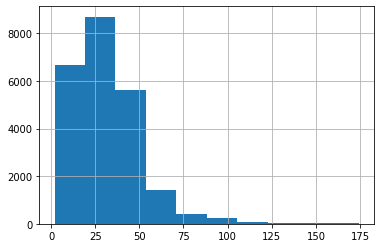

In [41]:
data['living_area'].hist();

График жилой площади напоминает распределение Пауссона и график жилой площади

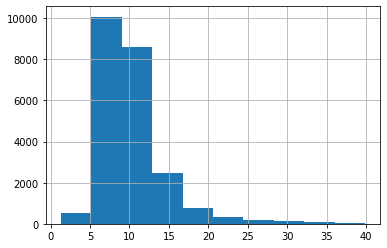

In [42]:
data['kitchen_area'].hist();

И этот график площади кухни чем-то похож на прошлые

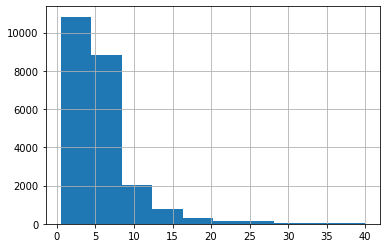

In [43]:
(data['last_price'] / 1000000).hist();

График цены квартир похож на распределение Пуассона, т.к. гистограмма начинается с большой частоты и постепенно уменьшается


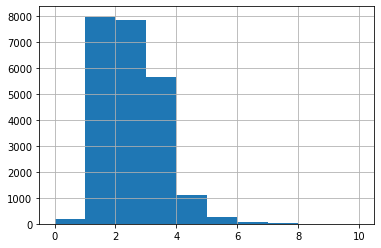

In [44]:
data['rooms'].hist();

Основное большинство квартир содержит от 1 до 3 комнат

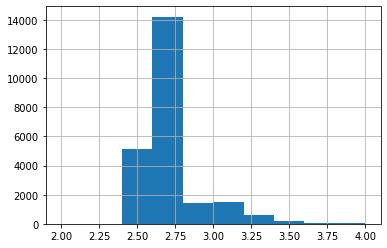

In [45]:
data['ceiling_height'].hist();

Большая часть высоты потолков около 270 см

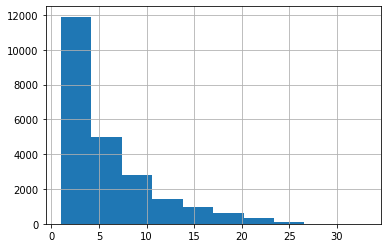

In [46]:
data['floor'].hist();

гистограмму этажей, на которых находятся квартиры из объявлений, описывает распределение Пауссона. Это логично, т.к. квартиры с разным количеством этажей, поэтому чаще встречаются значения ближе к 1

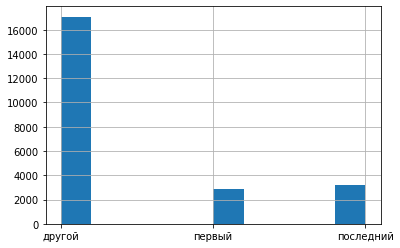

In [47]:
data['type_floor'].hist();

Абсолютное большинство квартир между первым и последним этажами, что логично.

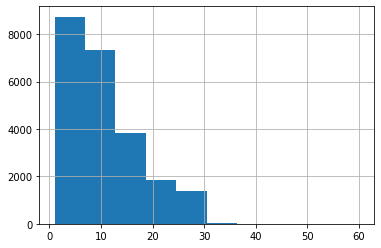

In [48]:
data['floors_total'].hist();

Больше всего квартир находятся в пятиэтажных домах. Чем выше дом, тем реже. Тоже похоже на расспределние Пауссона

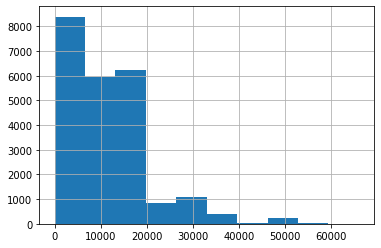

In [49]:
data['cityCenters_nearest'].hist();

Практически все значения лежат до 20000 м

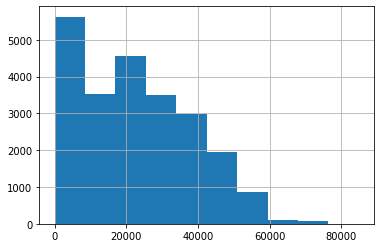

In [50]:
data['airports_nearest'].hist();

Ничего особенного нет

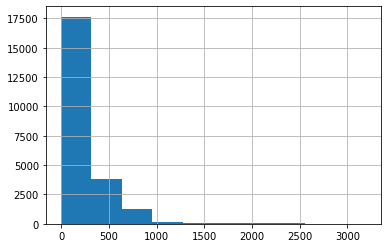

In [51]:
data['parks_nearest'].hist();

Из-за большого кол-ва пропусков много значений близки к нулю

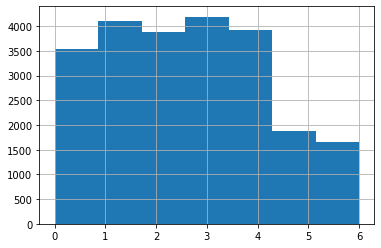

In [52]:
data['weekday'].hist(bins = 7);

Чаще объявления размещали в будние дни, чем в выходные

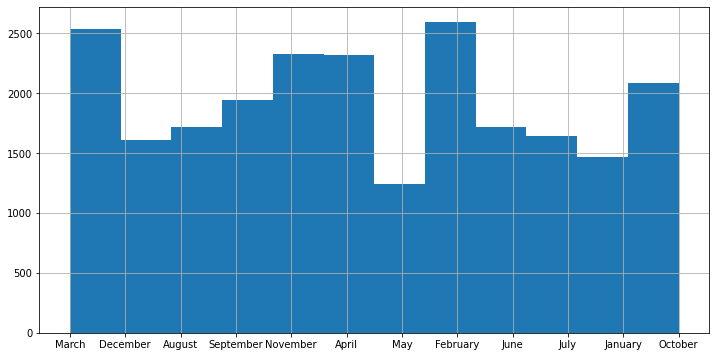

In [53]:
data['month'].hist(bins=12, figsize=(12,6)); # увеличим размеры, чтобы не слипались названия

Сильно выделяющихся значений нет

Теперь посмотрим на сроки продаж квартир

Среднее значение равно 155.13551059148367
Медиана равна 73.0


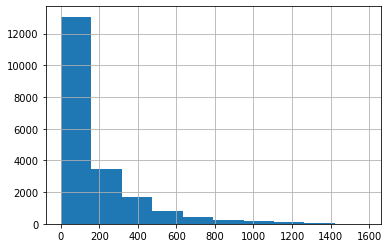

In [54]:
data.query('days_exposition > 0')['days_exposition'].hist()
print('Среднее значение равно', data['days_exposition'].mean())
print('Медиана равна', data['days_exposition'].median())

In [55]:
print(16000*100 / 23179)

69.02799948229


По данной гистограмме можно сказать, что около 70% квартир были проданы в течение 100 дней. По среднему значению, медиане и графику можно сказать, что быстрыми продажами являются квартиры, проданные примерно за первые три месяца(около 90 дней), а долгими - квартиры, которые не были проданы за 200 дней и больше

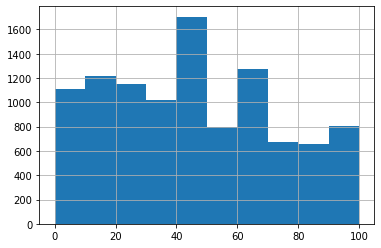

In [56]:
data.query('days_exposition > 0')['days_exposition'].hist(range = (0, 100));

Посмотрим на факторы, которые больше всего влияют на полную стоимость объекта

0.7798794574858691


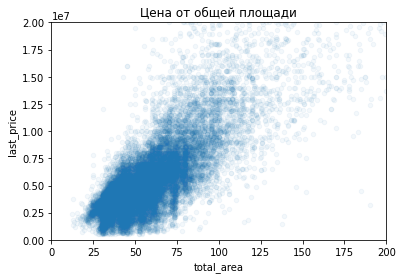

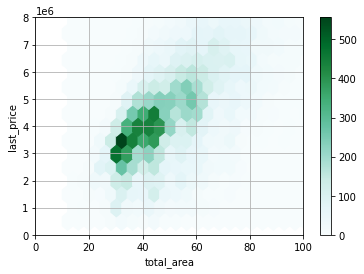

In [57]:
data.plot(x = 'total_area', y = 'last_price', kind = 'scatter', alpha = 0.05, xlim=(0,200), ylim=(0,20000000), title = 'Цена от общей площади')
data.plot(x = 'total_area', y = 'last_price', kind = 'hexbin', sharex=False, grid=True, xlim=(0,100), ylim=(0,8000000), gridsize=70)
print(data['total_area'].corr(data['last_price']))

Чем больше площадь, тем выше цена. Зависимость есть

Будем использовать график вида hexbin, т.к. точек очень много и каждая в отдельности нам не интересна

0.6607677978668975


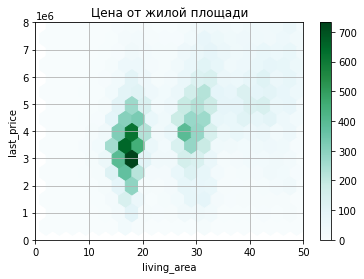

In [58]:
data.plot(x = 'living_area', y = 'last_price', kind = 'hexbin', sharex=False, grid=True, xlim=(0,50), ylim=(0,8000000), gridsize=70, title = 'Цена от жилой площади')
print(data['living_area'].corr(data['last_price']))

Зависимость есть, но чуть менее явная, чем прошлая

0.5487283495236205


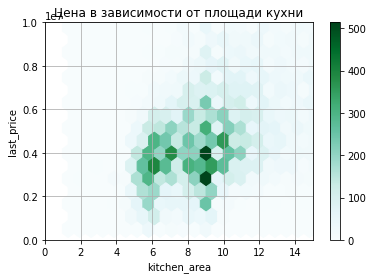

In [59]:
data.plot(x = 'kitchen_area', y = 'last_price', kind = 'hexbin', sharex=False, grid=True, xlim=(0,15), ylim=(0,10000000), gridsize=60, title = 'Цена в зависимости от площади кухни')
print(data['kitchen_area'].corr(data['last_price']))

Есть небольшая зависимость

0.5039455768678253


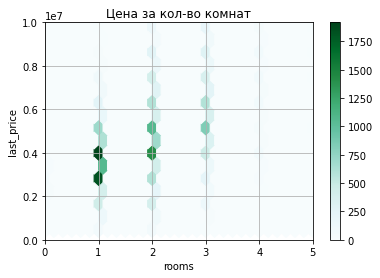

In [60]:
data.plot(x = 'rooms', y = 'last_price', kind = 'hexbin', sharex=False, grid=True, ylim=(0,10000000), xlim=(0, 5), gridsize=60, title = 'Цена за кол-во комнат')
print(data['rooms'].corr(data['last_price']))

Есть слабая зависимость, т.к. чем больше комнат, тем чуть выше находится самый зеленый шестиугольник среди определенного кол-ва комнат 

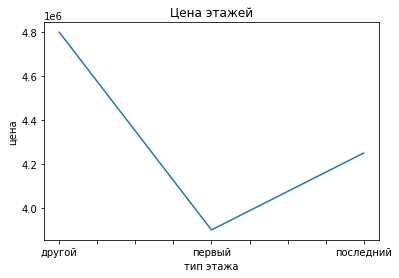

In [61]:
data.groupby('type_floor')['last_price'].median().plot(xlabel='тип этажа', ylabel='цена', title = 'Цена этажей');

Получился значок Nike, а это означает, что зависимость есть. Квартиры между первым и последнем этажом самые дорогие. Потом идут квартиры на последнем этаже и самые дешевые квартиры расположены на первом этаже

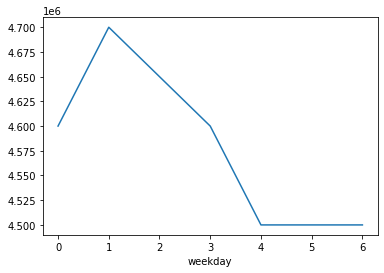

In [62]:
data.groupby('weekday')['last_price'].median().plot();

На первый взгляд, по графику, кажется, что есть очевидная зависимость цены от дня недели, но, если посмотреть на разницу в цене, то разница в 200 000 рублей между самым высоким и низким показателем кажется маленькой. Зависимости нет

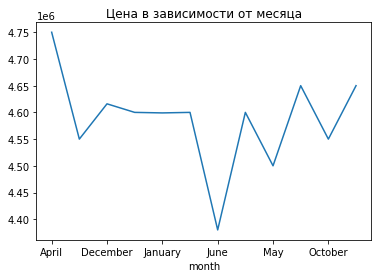

In [63]:
data.groupby('month')['last_price'].median().plot(title = 'Цена в зависимости от месяца');

Зависимости нет

126
year
2014     126
2015    1120
2016    2696
2017    8023
2018    8387
2019    2827
Name: year, dtype: int64


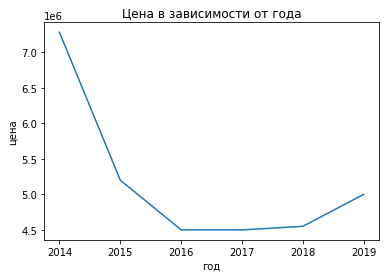

In [64]:
data.groupby('year')['last_price'].median().plot(xlabel='год', ylabel='цена', title = 'Цена в зависимости от года')
print(len(data[data['year'] == 2014]))
print(data.groupby('year')['year'].count())#посмотрим, сколько объялений было размещено в каждом году

Если не считать 2014 год, т.к. в нем слишком мало значений по сравнению с другими, то зависимость слишком слабая

Из всех графиков можно сделать вывод, что стоймость квартир больше всего зависит от общей площади, потом от жилой площади, от этажа, на котором расположена квартира. Слабая зависимость цены квартиры от кол-ва комнат, площади кухни и года размещения объявления. Нет зависимости цены от: дня недели и месяца размещения объявления

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [65]:
data_ten_localities = data.pivot_table(index='locality_name', values='price_one_meter')
data_ten_localities['count'] = data.groupby('locality_name')['last_price'].count()
data_ten_localities.sort_values('count', ascending=False).head(10)

,price_one_meter,count
locality_name,,
Санкт-Петербург,111345.074356,15300
поселок Мурино,85628.475547,551
поселок Шушары,78577.014984,438
Всеволожск,68605.572959,397
Пушкин,102699.723435,360
Колпино,75333.295801,337
поселок Парголово,90175.913458,327
Гатчина,68746.146763,307
деревня Кудрово,92473.547576,299


В Санкт-Петербурге самая высокая стоимость одного квадратного метра, а в Выборге - самая низкая

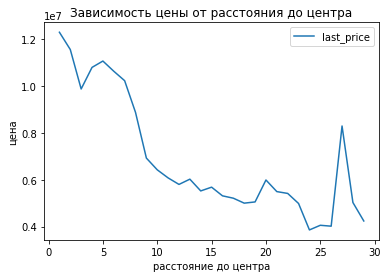

In [66]:
piter = data.query('locality_name == "Санкт-Петербург"')
piter = piter.query('center_km>0')
piter = piter.reset_index(drop=True)
piter = piter.pivot_table(index='center_km', values='last_price')
piter.plot(xlabel='расстояние до центра', ylabel='цена', title='Зависимость цены от расстояния до центра');

По графику видно, что зависимость цены квартиры от расстояния до центра есть. И чем она ближе к центру, тем выше цена

### Общий вывод

В данном проекте мы изучили данные сервиса Яндекс.Недвижимость, в которых было 23699 строки и 22 столбца информации про объявления о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. После изучения данных мы перешли к предобработке данных. В них нам пришлось удалить некоторые строчки из данных из-за некорректных значений или пропусков. Столбцы, в которых было много пропусков, заменяли на медианные значения или оставляли пропуски. После этого поменяли в некоторых столбцах типы данных на те, с которыми удобнее работать. Исправили неявные дубликаты. И только после всех этих действий мы перешли к самой задаче. Для этого добавили к таблице новые столбцы, с которыми удобнее работать. Затем провели исследовательский анализ с помощью гистограмм таких данных, как: различные площади, цены объекта, кол-во комнат, высота потолков, этаж и его тип,  общее количество этажей в доме, день и месяц публикации объявления и различные расстояния до других объектов. Посмотрели, как быстро продавались квартиры, определили, какие факторы больше всего влияют на полную стоимость квартир. Изучив зависимости цены от: средней цены каждого километра, общей площади, жилой площади, площади кухни, количества комнат, этажа, на котором расположена квартира, даты размещения. Нашли среднюю цену одного квадратного метра в самых популярных населённых пунктах. Это все помогло нам с помощью данных сервиса Яндекс.Недвижимость определить рыночную стоимость объектов недвижимости и найти интересные особенности и зависимости.